# Dimensionality Reduction and Clustering

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
dge_matrix_filtered = pd.read_csv(
    "data/MCA2_filtered.dge.txt", delimiter="\t", index_col=0
)

In [35]:
random_state = 42
min_neighbors = 50

In [36]:
import os

os.makedirs("figures", exist_ok=True)
os.makedirs("embeddings", exist_ok=True)

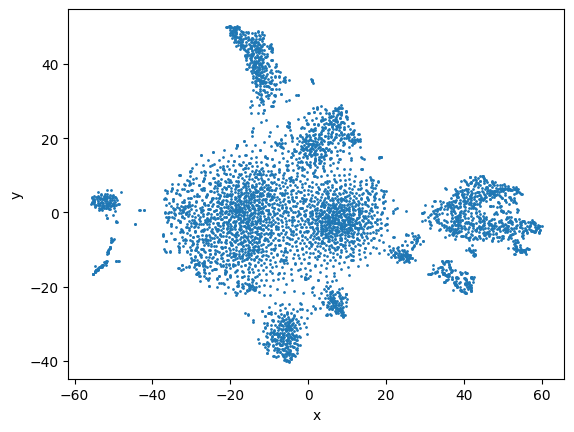

In [37]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=random_state, max_iter=1000)
tsne_results = tsne.fit_transform(dge_matrix_filtered.T)

# Plot the t-SNE results
tsne_fig = plt.figure()
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
tsne_fig.savefig("figures/tsne_plot.png")

tsne_results_df = pd.DataFrame(tsne_results, columns=["x", "y"])
tsne_results_df.to_csv("embeddings/tsne_results.csv", index=False)

/Users/cytronicoder/Downloads/biorsp-new/.venv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


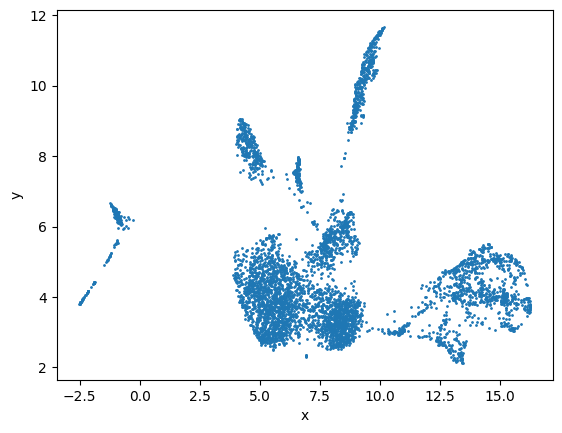

In [38]:
# UMAP
from umap import UMAP

umap_reducer = UMAP(n_neighbors=15, min_dist=0.1, random_state=random_state)
umap_results = umap_reducer.fit_transform(dge_matrix_filtered.T)

# Plot the UMAP results
umap_fig = plt.figure()
plt.scatter(umap_results[:, 0], umap_results[:, 1], s=1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
umap_fig.savefig("figures/umap_plot.png")

umap_results_df = pd.DataFrame(umap_results, columns=["x", "y"])
umap_results_df.to_csv("embeddings/umap_results.csv", index=False)

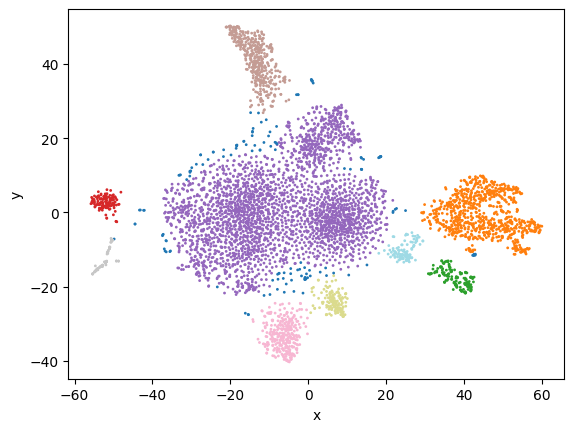

In [41]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4, min_samples=50)
dbscan_labels = dbscan.fit_predict(
    tsne_results
)  # Use either tsne_results or umap_results
dbscan_labels += 1

# Visualize clusters
tsne_dbscan_fig = plt.figure()
scatter = plt.scatter(
    tsne_results[:, 0], tsne_results[:, 1], c=dbscan_labels, s=1, cmap="tab20"
)
# legend = plt.legend(*scatter.legend_elements(), title="Cluster")

# for i in range(len(legend.get_texts())):
#     legend.get_texts()[i].set_text(f"{i}")

# legend.get_texts()[0].set_text("Noise")
# plt.gca().add_artist(legend)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
tsne_dbscan_fig.savefig("figures/tsne_dbscan_plot.png")

dbscan_results_df = pd.DataFrame(dbscan_labels, columns=["Cluster"])
dbscan_results_df.to_csv("embeddings/tsne_dbscan_results.csv", index=False)

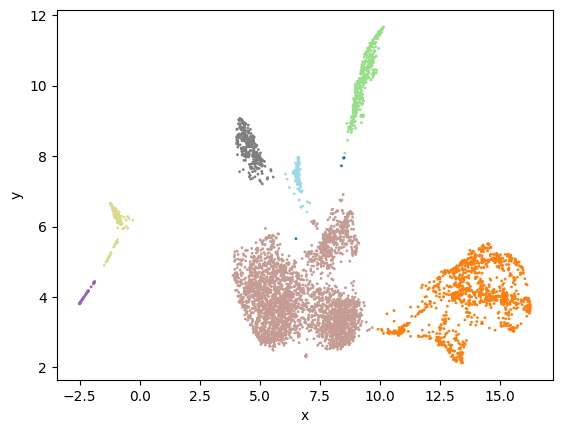

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=20)
dbscan_labels = dbscan.fit_predict(
    umap_results
)  # Use either tsne_results or umap_results
dbscan_labels += 1

# Visualize clusters
umap_dbscan_fig = plt.figure()
scatter = plt.scatter(
    umap_results[:, 0], umap_results[:, 1], c=dbscan_labels, s=1, cmap="tab20"
)
# legend = plt.legend(*scatter.legend_elements(), title="Cluster")

# for i in range(len(legend.get_texts())):
#     legend.get_texts()[i].set_text(f"{i}")

# legend.get_texts()[0].set_text("Noise")
# plt.gca().add_artist(legend)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
umap_dbscan_fig.savefig("figures/umap_dbscan_plot.png")

dbscan_results_df = pd.DataFrame(dbscan_labels, columns=["Cluster"])
dbscan_results_df.to_csv("embeddings/umap_dbscan_results.csv", index=False)